In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Model function

In [10]:
def model(x, a, b, c):
    return a * np.exp(-b * x) + c

### Define the data to be fit with some noise:

In [11]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)

np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

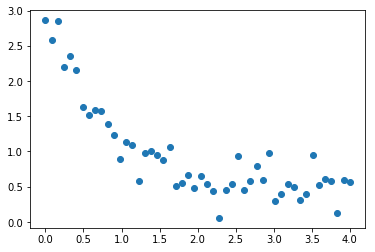

In [12]:
plt.plot(xdata, ydata, 'o', label='data')

### Fit for the parameters a, b, c of the function func:

In [13]:
popt1, pcov = curve_fit(model, xdata, ydata)
popt1

array([2.55423706, 1.35190947, 0.47450618])

##### Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

In [16]:
popt2, pcov = curve_fit(model, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt2

array([2.43708906, 1.        , 0.35015434])

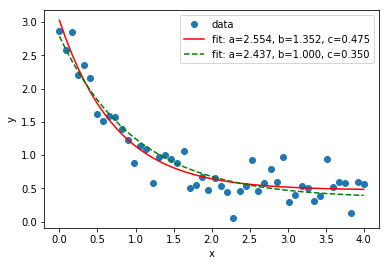

In [18]:
plt.plot(xdata, ydata, 'o', label='data')

plt.plot(xdata, model(xdata, *popt1), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))

plt.plot(xdata, func(xdata, *popt2), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()